<center><h1 style="font-size:39px; LINE-HEIGHT:0px">Project 1 - Classification<h1 style="font-size:39px; LINE-HEIGHT:0px"></center>
<center><h1 style="font-size:29px; LINE-HEIGHT:0px"> Machine Learning Spring 2021 <h1 style="font-size:19px; LINE-HEIGHT:0px"></center>

<h2>Default of Credit card</h2>
<h2>Source of Dataset</h2>

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn import svm

In [2]:
dcc = pd.read_excel('default of credit card clients.xls',skiprows=1)
dcc.drop(['ID'], axis=1, inplace=True)

In [3]:
dcc

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
dcc.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
dcc.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
dcc.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<b> Delete 5.5% of random values, Categorical variables and Age are left alone </b>

In [7]:
np.random.seed(seed=0)
masking_array= np.random.randint(100,size=(dcc.shape[0], 19)) < 94.5
masking_array


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True, False,  True]])

In [8]:
dcc[dcc.columns[5:25]]=dcc[dcc.columns[5:25]].where(masking_array, np.nan)

In [9]:
dcc.isna().sum()

LIMIT_BAL                        0
SEX                              0
EDUCATION                        0
MARRIAGE                         0
AGE                              0
PAY_0                         1496
PAY_2                         1490
PAY_3                         1550
PAY_4                         1502
PAY_5                         1437
PAY_6                         1474
BILL_AMT1                     1459
BILL_AMT2                     1473
BILL_AMT3                     1514
BILL_AMT4                     1432
BILL_AMT5                     1462
BILL_AMT6                     1530
PAY_AMT1                      1466
PAY_AMT2                      1518
PAY_AMT3                      1491
PAY_AMT4                      1440
PAY_AMT5                      1475
PAY_AMT6                      1612
default payment next month    1518
dtype: int64

<b> Function to find missing data in percentage </b>

In [10]:
def missing_data_percentage(df):
    x = ['column_name','missing_values', 'missing_in_percentage']
    missing_data = pd.DataFrame(columns=x)
    columns = dcc.columns
    for col in columns:
        iscolumn_name = col
        ismissing_values = dcc[col].isnull().sum()
        ismissing_in_percentage = (dcc[col].isnull().sum()/dcc[col].shape[0])*100
        
        missing_data.loc[len(missing_data)] = [iscolumn_name, ismissing_values, ismissing_in_percentage]
    print(missing_data.round(2))
    
    

In [11]:
missing_data_percentage(dcc)

                   column_name missing_values  missing_in_percentage
0                    LIMIT_BAL              0                   0.00
1                          SEX              0                   0.00
2                    EDUCATION              0                   0.00
3                     MARRIAGE              0                   0.00
4                          AGE              0                   0.00
5                        PAY_0           1496                   4.99
6                        PAY_2           1490                   4.97
7                        PAY_3           1550                   5.17
8                        PAY_4           1502                   5.01
9                        PAY_5           1437                   4.79
10                       PAY_6           1474                   4.91
11                   BILL_AMT1           1459                   4.86
12                   BILL_AMT2           1473                   4.91
13                   BILL_AMT3    

<b> Data Cleaning <b>

In [12]:
print(dcc.apply(lambda col: col.unique()))

LIMIT_BAL                     [20000, 120000, 90000, 50000, 500000, 100000, ...
SEX                                                                      [2, 1]
EDUCATION                                                 [2, 1, 3, 5, 4, 6, 0]
MARRIAGE                                                           [1, 2, 3, 0]
AGE                           [24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 3...
PAY_0                         [2.0, -1.0, 0.0, nan, 1.0, -2.0, 3.0, 4.0, 8.0...
PAY_2                         [2.0, 0.0, nan, -2.0, -1.0, 3.0, 5.0, 7.0, 4.0...
PAY_3                         [-1.0, 0.0, 2.0, -2.0, nan, 3.0, 4.0, 6.0, 7.0...
PAY_4                         [-1.0, 0.0, -2.0, 2.0, nan, 3.0, 4.0, 5.0, 7.0...
PAY_5                         [-2.0, 0.0, -1.0, 2.0, nan, 3.0, 5.0, 4.0, 7.0...
PAY_6                         [-2.0, 2.0, 0.0, -1.0, nan, 3.0, 4.0, 6.0, 7.0...
BILL_AMT1                     [3913.0, 2682.0, 29239.0, 46990.0, 8617.0, 644...
BILL_AMT2                     [3102.0, 1

<b>Content of Data</b>

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (0=?, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (0=?,1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 
8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 

PAY_3: Repayment status in July, 2005 

PAY_4: Repayment status in June, 2005 

PAY_5: Repayment status in May, 2005 

PAY_6: Repayment status in April, 2005 )

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)


BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)


PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)



Education type for levels 0,4,5,6 is unknown. We combine and label them as 0

In [13]:
dcc.loc[dcc.EDUCATION >= 4, 'EDUCATION'] = 0

In [14]:
dcc['EDUCATION'].unique()

array([2, 1, 3, 0], dtype=int64)

Marriage status for 0 and 3 is unknown. We combine and label them as 0

In [15]:
dcc.loc[dcc.MARRIAGE == 3, 'MARRIAGE'] = 0

In [16]:
dcc['MARRIAGE'].unique()


array([1, 2, 0], dtype=int64)

<b> Filling up missing values </b>

In [17]:
dcc['PAY_0'].fillna(dcc['PAY_0'].mode()[0],inplace= True)
dcc['PAY_2'].fillna(dcc['PAY_2'].mode()[0],inplace= True)
dcc['PAY_3'].fillna(dcc['PAY_3'].mode()[0],inplace= True)
dcc['PAY_4'].fillna(dcc['PAY_4'].mode()[0],inplace= True)
dcc['PAY_5'].fillna(dcc['PAY_5'].mode()[0],inplace= True)
dcc['PAY_6'].fillna(dcc['PAY_6'].mode()[0],inplace= True)

In [18]:
dcc['PAY_AMT1'].fillna(dcc['PAY_AMT1'].mean(),inplace= True)
dcc['PAY_AMT2'].fillna(dcc['PAY_AMT2'].mean(),inplace= True)
dcc['PAY_AMT3'].fillna(dcc['PAY_AMT3'].mean(),inplace= True)
dcc['PAY_AMT4'].fillna(dcc['PAY_AMT4'].mean(),inplace= True)
dcc['PAY_AMT5'].fillna(dcc['PAY_AMT5'].mean(),inplace= True)
dcc['PAY_AMT6'].fillna(dcc['PAY_AMT6'].mean(),inplace= True)

In [19]:
dcc['BILL_AMT1'].fillna(dcc['BILL_AMT1'].mean(),inplace= True)
dcc['BILL_AMT2'].fillna(dcc['BILL_AMT1'].mean(),inplace= True)
dcc['BILL_AMT3'].fillna(dcc['BILL_AMT1'].mean(),inplace= True)
dcc['BILL_AMT4'].fillna(dcc['BILL_AMT1'].mean(),inplace= True)
dcc['BILL_AMT5'].fillna(dcc['BILL_AMT1'].mean(),inplace= True)
dcc['BILL_AMT6'].fillna(dcc['BILL_AMT1'].mean(),inplace= True)


In [20]:
dcc['default payment next month'].fillna(dcc['default payment next month'].mode()[0],inplace= True)

In [21]:
dcc.shape

(30000, 24)

In [22]:
dcc.rename(columns={'default payment next month':'Default_Payment'}, inplace=True)

In [23]:
dcc.isna().sum()

LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
Default_Payment    0
dtype: int64

In [24]:
dcc

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Payment
0,20000,2,2,1,24,2.0,2.0,-1.0,-1.0,-2.0,...,0.000000,0.000000,0.0,0.0,689.0,0.000000,0.000000,0.0,0.000000,1.0
1,120000,2,2,2,26,-1.0,2.0,0.0,0.0,0.0,...,3272.000000,3455.000000,3261.0,0.0,1000.0,5237.201831,1000.000000,0.0,2000.000000,1.0
2,90000,2,2,2,34,0.0,0.0,0.0,0.0,0.0,...,14331.000000,14948.000000,15549.0,1518.0,1500.0,1000.000000,1000.000000,1000.0,5000.000000,0.0
3,50000,2,2,1,37,0.0,0.0,0.0,0.0,0.0,...,28314.000000,28959.000000,29547.0,2000.0,2019.0,1200.000000,1100.000000,1069.0,1000.000000,0.0
4,50000,1,2,1,57,-1.0,0.0,-1.0,0.0,0.0,...,20940.000000,19146.000000,19131.0,2000.0,36681.0,10000.000000,9000.000000,689.0,5231.909046,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0.0,0.0,0.0,0.0,0.0,...,88004.000000,51161.035318,15980.0,8500.0,20000.0,5003.000000,3047.000000,5000.0,1000.000000,0.0
29996,150000,1,3,2,43,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.000000,5190.000000,0.0,1837.0,3526.0,8998.000000,129.000000,0.0,0.000000,0.0
29997,30000,1,2,2,37,4.0,3.0,2.0,-1.0,0.0,...,51161.035318,20582.000000,19357.0,0.0,0.0,22000.000000,4200.000000,2000.0,3100.000000,1.0
29998,80000,1,3,1,41,1.0,-1.0,0.0,0.0,0.0,...,52774.000000,11855.000000,48944.0,85900.0,3409.0,1178.000000,1926.000000,52964.0,1804.000000,1.0


<b> Exploratory Data Analysis </b>

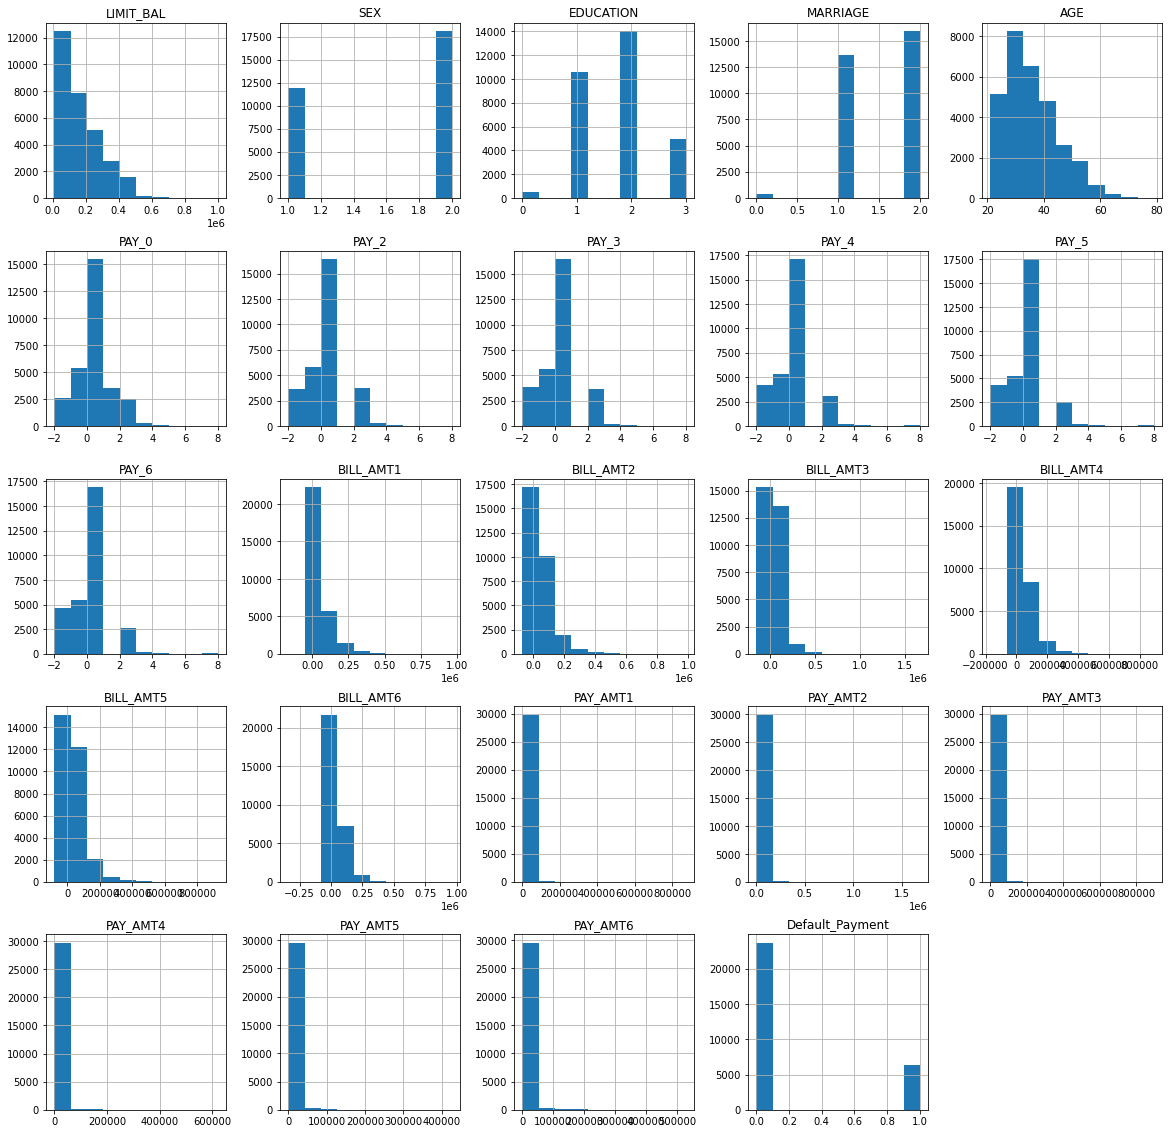

In [25]:
dcc.hist(figsize=(20,20));

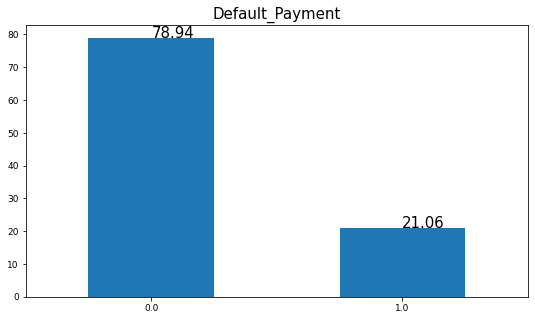

In [26]:
a = (dcc.Default_Payment.value_counts(normalize=True)*100)
a.plot.bar(figsize=(9,5))
plt.xticks(fontsize=9, rotation=0)
plt.yticks(fontsize=9)
plt.title("Default_Payment", fontsize=15)
for x,y in zip([0,1],a):
    plt.text(x,y,round(y,2),fontsize=15)
plt.show()

We can see that the dataset consists of <b>78.9% </b> clients are not expected to default payment whereas <b> 21.0%</b>  
clients are expected to default the payment. This graph also indicates the our target data column(<b>Default_Payment</b>) is <b>imbalanced</b>.

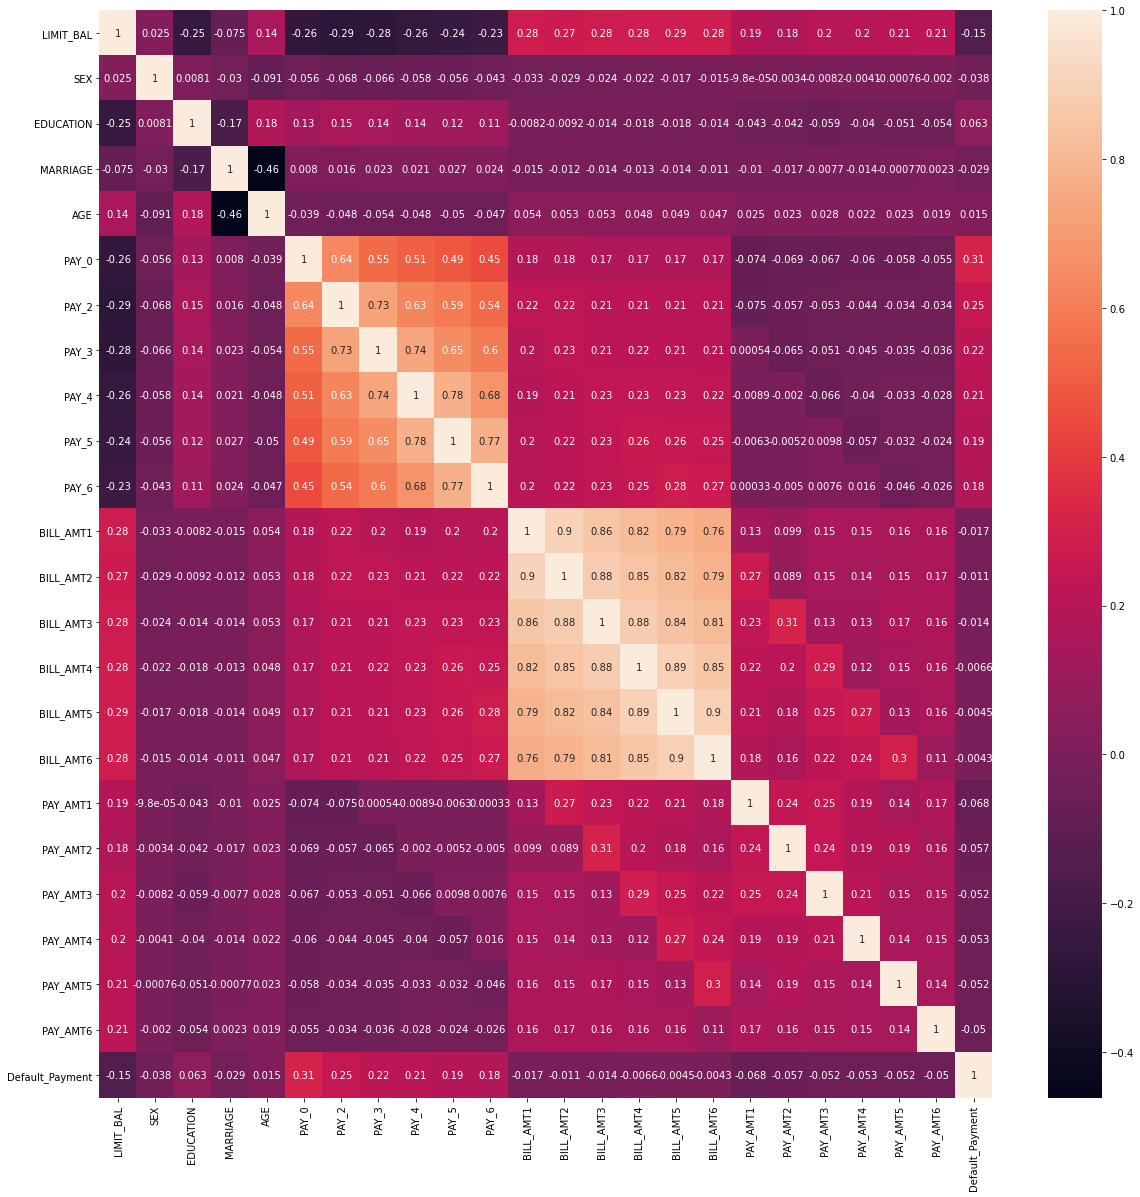

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(dcc.corr(), annot=True);

There is a weak correlation between all the columns of PAY and BILL_AMT and 
There is Negative correlation between LIMIT_BAL and PAY column values

<b> Data Prepartion for Analysis and classification </b>

<b> 1. Train Test Split </b>

In [28]:
X = dcc.drop('Default_Payment',axis =1)
y = dcc['Default_Payment']
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

<b> 2. Scaling </b>

In [29]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

<h1> Classification Model </h1> 

<h2> 1. k-nearest neighbors (KNN) <h2>

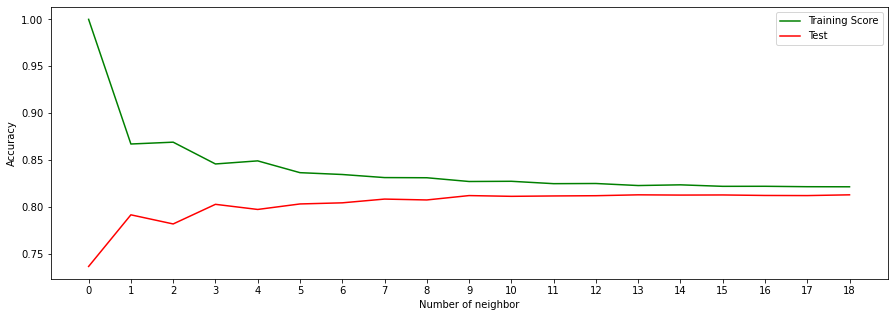

In [30]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

knn_training = []
knn_testing = []
xvalues = range(1,20)

for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors = i)   
    knn.fit(X_train,y_train)
    train_score_knn=knn.score(X_train,y_train)
    test_score_knn=knn.score(X_test,y_test)
    knn_training.append(train_score_knn)
    knn_testing.append(test_score_knn)

plt.subplots(figsize = (15,5))
plt.plot(xvalues, knn_training, color='g', label = 'Training Score')
plt.plot(xvalues, knn_testing, color='r', label = 'Test')
plt.xticks(xvalues, range(19))
plt.xlabel('Number of neighbor')
plt.ylabel('Accuracy')
plt.legend()



In [31]:
knn=KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=9)

neighbors(k) = 9 is the best parameter for knn model

In [32]:
print('Training score: {:.3f}'.format(knn.score(X_train, y_train)))
print('Testing score: {:.3f}'.format(knn.score(X_test, y_test)))

Training score: 0.831
Testing score: 0.807


In [33]:
X_train.shape

(22500, 23)

<b> Cross validation scores for KNN Classifier </b>

In [34]:
knn_CV_scores = cross_val_score(knn, X_train, y_train, cv=7)

pd.DataFrame({'Train Score - Cross Validation  ': knn_CV_scores})

,Train Score - Cross Validation
0,0.805910
1,0.808087
2,0.815184
3,0.809583
4,0.807716
5,0.805227
6,0.808650


<b> Grid Search on KNN Classifier </b>

In [35]:
grid_knn_parameters = {'n_neighbors':range(1,20), 'p': [1,2],
            'weights': ['uniform','distance'],
            'metric': ['euclidean','manhattan']}

knn_CV = GridSearchCV(KNeighborsClassifier(), grid_knn_parameters, verbose = 1, cv = 7, n_jobs = -1)

Knn_results = knn_CV.fit(X_train, y_train)

Fitting 7 folds for each of 152 candidates, totalling 1064 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1064 out of 1064 | elapsed:  6.5min finished


In [36]:
round(knn_CV.score(X_test,y_test),2)

0.81

In [37]:
print("KNN grid search Best Parameters ")
best_parameters_knn=Knn_results.best_params_
best_parameters_knn

KNN grid search Best Parameters 


{'metric': 'manhattan', 'n_neighbors': 19, 'p': 1, 'weights': 'distance'}

In [38]:
best_para_Knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 19, p = 1, weights = 'distance', algorithm ='auto')
best_para_Knn.fit(X_train, y_train)
Knn_value_y = best_para_Knn.predict(X_test)



In [39]:
print('Training score: {:.3f}'.format(best_para_Knn.score(X_train, y_train)))
print('Testing score: {:.3f}'.format(best_para_Knn.score(X_test, y_test)))

Training score: 1.000
Testing score: 0.810


In [40]:
print(classification_report(y_pred = Knn_value_y, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      5950
         1.0       0.60      0.25      0.35      1550

    accuracy                           0.81      7500
   macro avg       0.71      0.60      0.62      7500
weighted avg       0.78      0.81      0.78      7500



In [41]:
print(confusion_matrix(y_pred = Knn_value_y, y_true = y_test))

[[5687  263]
 [1162  388]]


In [42]:
import mglearn

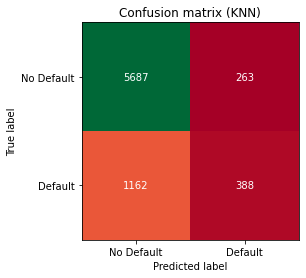

In [43]:
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = Knn_value_y, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix (KNN)")
plt.gca().invert_yaxis()

In [44]:
Knn_precision_score=precision_score(y_test, best_para_Knn.predict(X_test))
print('Precision score : {:.2f} '.format(Knn_precision_score))

Precision score : 0.60 


In [45]:
Knn_recall_score = recall_score(y_test, best_para_Knn.predict(X_test))
print('Recall score : {:.2f} '.format(Knn_recall_score))

Recall score : 0.25 


In [46]:
Knn_f1_score = f1_score(y_test,best_para_Knn.predict(X_test))
print('f1 score : {:.2f} '.format(Knn_f1_score))

f1 score : 0.35 


<b>The precision-recall curve is used for evaluating the performance of binary classification algorithms. It is often used in situations where classes are heavily imbalanced </b>

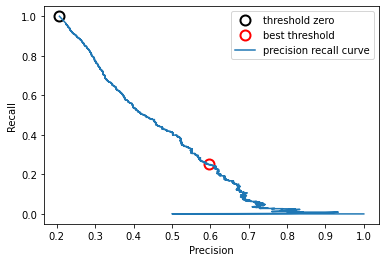

In [47]:
import mglearn

%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, best_para_Knn.predict_proba(X_test)[:,1])

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(Knn_precision_score, Knn_recall_score, 'o', markersize=10, label="best threshold", fillstyle="none", c='r', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [48]:
Summary_Knn= {'Type': 'K-nearest Neighbors (KNN) Classification Model', 'Training Score': best_para_Knn.score(X_train, y_train)*100,
              'Testing Score':best_para_Knn.score(X_test, y_test)*100,
              'f1 Score':f1_score(y_test, best_para_Knn.predict(X_test))};

In [49]:
Summary_Knn

{'Type': 'K-nearest Neighbors (KNN) Classification Model',
 'Training Score': 100.0,
 'Testing Score': 81.0,
 'f1 Score': 0.35256701499318494}

<h2>2. Logistic Regression</h2>

In [50]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_training = []
l1_testing = []
l2_training = []
l2_testing = []
#As liblinear and saga handle 'l1 and l2' penalty, for small datasets, ‘liblinear’ is a good choice, whereas ‘sag’and ‘saga’ are faster for large ones 
for c in c_range:
    l1_logistic = LogisticRegression(penalty = 'l1', C = c,solver='liblinear', n_jobs = -1)
    l2_logistic = LogisticRegression(penalty = 'l2', C = c,solver = 'lbfgs', n_jobs = -1)
    l1_logistic.fit(X_train, y_train)
    l2_logistic.fit(X_train, y_train)
    l1_training.append(l1_logistic.score(X_train, y_train))
    l1_testing.append(l1_logistic.score(X_test, y_test))
    l2_training.append(l2_logistic.score(X_train, y_train))
    l2_testing.append(l2_logistic.score(X_test, y_test))

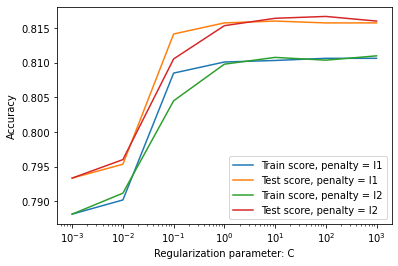

In [51]:
plt.plot(c_range, l1_training, label = 'Train score, penalty = l1')
plt.plot(c_range, l1_testing, label = 'Test score, penalty = l1')
plt.plot(c_range, l2_training, label = 'Train score, penalty = l2')
plt.plot(c_range, l2_testing, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')


According to above graph, C=100 & l2 penalty, test accuracy is best.

In [52]:
logistic = LogisticRegression(penalty = 'l2', C=100)

logistic.fit(X_train, y_train)

print('Training score: {:.3f}'.format(logistic.score(X_train, y_train)))
print('Testing score: {:.3f}'.format(logistic.score(X_test, y_test)))

Training score: 0.810
Testing score: 0.817


In [53]:
logistic_CV_scores = cross_val_score(logistic, X_train, y_train, cv=5)

pd.DataFrame({'Train Score - Cross Validation  ': logistic_CV_scores})

,Train Score - Cross Validation
0,0.811333
1,0.812000
2,0.812444
3,0.805111
4,0.811111


In [54]:
print("Average cross-validation score is : {:.2f}".format(logistic_CV_scores.mean()))

Average cross-validation score is : 0.81


<b>Applying Grid Search with Logistic Regression</b>

In [55]:
logistic.get_params()

{'C': 100,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [56]:
param_grid_logit = { 'max_iter' : range(1,200), 'penalty' : ['l1','l2'],
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logit_class_CV = GridSearchCV(estimator = logistic, param_grid = param_grid_logit, cv = 5, verbose = 1, n_jobs = -1, return_train_score = True)
GS_results_logit = logit_class_CV.fit(X_train, y_train)

best_parameters_logit = logit_class_CV.best_params_


Fitting 5 folds for each of 2786 candidates, totalling 13930 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 4768 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 5218 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 5768 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 6874 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 7624 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 8930 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 9880 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 11386 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 13104 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 13930 out of 13930 | elapsed:  6.6min finished


In [57]:
print("Logistic grid search Best score ")
GS_results_logit.best_score_

Logistic grid search Best score 


0.8110666666666667

In [58]:
best_parameters = logit_class_CV.best_params_
print("Logistic grid search Best parameters: ")
best_parameters_logit

Logistic grid search Best parameters: 


{'C': 1000, 'max_iter': 90, 'penalty': 'l2'}

<b> Grid Search on Logistic Regressio with C=1000, max_iter=90, penalty=l2 </b>

In [59]:
best_para_logistic = LogisticRegression( C = 1000, max_iter = 90, penalty ='l2',)

best_para_logistic.fit(X_train,y_train)
logistic_value_y = best_para_logistic.predict(X_test)

print('Training score: {:.3f}'.format(best_para_logistic.score(X_train, y_train)))
print('Testing score: {:.3f}'.format(best_para_logistic.score(X_test, y_test)))

Training score: 0.811
Testing score: 0.817


In [60]:
print(classification_report(y_pred = logistic_value_y, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      5950
         1.0       0.71      0.19      0.30      1550

    accuracy                           0.82      7500
   macro avg       0.77      0.58      0.60      7500
weighted avg       0.80      0.82      0.77      7500



In [61]:
print(confusion_matrix(y_pred =logistic_value_y, y_true = y_test))

[[5830  120]
 [1256  294]]


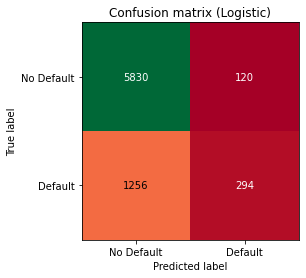

In [62]:
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = logistic_value_y, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'],yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix (Logistic)")
plt.gca().invert_yaxis()

In [63]:
print("Logistic grid search Best Score ")
GS_results_logit.best_score_

Logistic grid search Best Score 


0.8110666666666667

In [64]:
logistic_precision_score=precision_score(y_test, best_para_logistic.predict(X_test))
print('Precision score : {:.2f} '.format(logistic_precision_score))

Precision score : 0.71 


In [65]:
logistic_recall_score = recall_score(y_test, best_para_Knn.predict(X_test))
print('Recall score : {:.2f} '.format(logistic_recall_score))

Recall score : 0.25 


In [66]:
logistic_f1_score = f1_score(y_test, best_para_logistic.predict(X_test))
print('f1 score : {:.2f} '.format(logistic_f1_score))

f1 score : 0.30 


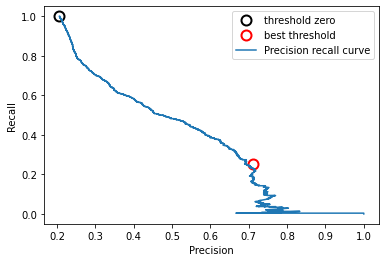

In [67]:
precision, recall, thresholds = precision_recall_curve(y_test, best_para_logistic.predict_proba(X_test)[:,1])

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(logistic_precision_score, logistic_recall_score, 'o', markersize=10,
         label="best threshold", fillstyle="none", c='r', mew=2)

plt.plot(precision, recall, label="Precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [68]:
Summary_Logistic= {'Type': 'Logistic Regression', 'Train Score': best_para_logistic.score(X_train, y_train)*100,
              'Testing Score':best_para_logistic.score(X_test, y_test)*100,
              'f1 Score':f1_score(y_test, best_para_logistic.predict(X_test))};

In [69]:
Summary_Logistic

{'Type': 'Logistic Regression',
 'Train Score': 81.05333333333333,
 'Testing Score': 81.65333333333334,
 'f1 Score': 0.2993890020366599}

<b>3. Linear Support Vector Machine Classifier</b>

In [70]:
from sklearn.svm import LinearSVC,SVC

c_val = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

lin_train_score =[]
lin_test_score =[]

for c in c_val:
    lin_svm = LinearSVC(C = c)
    lin_svm.fit(X_train, y_train)
    lin_train_score.append(lin_svm.score(X_train, y_train))
    lin_test_score.append(lin_svm.score(X_test, y_test))

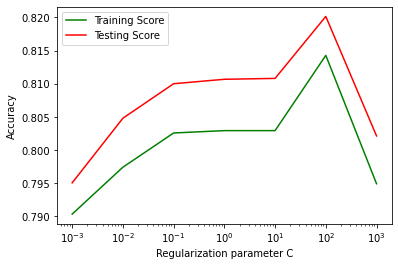

In [71]:
plt.plot(c_val, lin_train_score, label = 'Training Score', c = 'g')
plt.plot(c_val, lin_test_score, label = 'Testing Score', c = 'r')
plt.xscale('log')
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.legend()

Based on above graph C=100,test accuracy is best.


In [72]:
linear_svm = LinearSVC(C = 100)
linear_svm.fit(X_train, y_train)

print('Training score: {:.3f}'.format(linear_svm.score(X_train, y_train)))
print('Testing score: {:.3f}'.format(linear_svm.score(X_test, y_test)))

Training score: 0.795
Testing score: 0.802


In [73]:
linear_svm_cv = cross_val_score(linear_svm, X_train, y_train, cv=5)

pd.DataFrame({'Train Score - Cross Validation ': linear_svm_cv})

,Train Score - Cross Validation
0,0.789778
1,0.791778
2,0.808667
3,0.791556
4,0.791333


In [74]:
print("Average cross-validation score: {:.2f}".format(linear_svm_cv.mean()))

Average cross-validation score: 0.79


<b>Applying Grid Search with Linear Support Vector Machine Classifier</b>

In [75]:
param_linearSVM = { 'max_iter' : range(1,200),'C' : [ 0.001,0.01, 0.1, 1, 10, 100, 1000]}

CV_linearSVM = GridSearchCV(estimator = lin_svm, param_grid = param_linearSVM ,cv = 5, verbose = 1, n_jobs = -1, return_train_score = True)
GS_results_linearSVM = CV_linearSVM.fit(X_train, y_train)

best_parameters_linearSVM = CV_linearSVM.best_params_
print(best_parameters_linearSVM)

Fitting 5 folds for each of 1393 candidates, totalling 6965 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3392 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4792 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5642 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 6592 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 6965 out of 6965 | elapsed: 11.6min finished


{'C': 10, 'max_iter': 128}


In [76]:
print("Best score : Linear SVM grid search ")
GS_results_linearSVM.best_score_

Best score : Linear SVM grid search 


0.8086666666666666

In [77]:
print("Best parameters : Linear SVM grid search ")
best_parameters_linearSVM

Best parameters : Linear SVM grid search 


{'C': 10, 'max_iter': 128}

<b> GridSearch for Linear SVM Classification with C=10 and max_iter=128</b>

In [78]:
best_para_lin_SVM = LinearSVC(C = 10,max_iter = 128)
best_para_lin_SVM.fit(X_train, y_train)
SVM_value_y = best_para_lin_SVM.predict(X_test)
 
print('Training score: {:.3f}'.format(best_para_lin_SVM.score(X_train, y_train)))
print('Testing score: {:.3f}'.format(best_para_lin_SVM.score(X_test, y_test)))



Training score: 0.796
Testing score: 0.803


In [79]:
print(classification_report(y_pred = SVM_value_y, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89      5950
         1.0       0.76      0.07      0.12      1550

    accuracy                           0.80      7500
   macro avg       0.78      0.53      0.51      7500
weighted avg       0.79      0.80      0.73      7500



In [80]:
print(confusion_matrix(y_pred = SVM_value_y, y_true = y_test))

[[5917   33]
 [1446  104]]


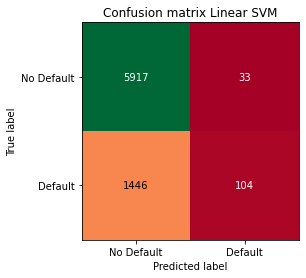

In [81]:
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = SVM_value_y, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'],yticklabels=['No Default','Default'], cmap ="RdYlGn", fmt="%d")
plt.title("Confusion matrix Linear SVM")
plt.gca().invert_yaxis()



In [82]:
lin_SVM_precision_score=precision_score(y_test, best_para_lin_SVM.predict(X_test))
print('Precision score : {:.2f} '.format(lin_SVM_precision_score))
      

Precision score : 0.76 


In [83]:
lin_SVM_recall_score = recall_score(y_test, best_para_lin_SVM.predict(X_test))
print('Recall score : {:.2f} '.format(lin_SVM_recall_score))

Recall score : 0.07 


In [84]:
lin_SVM_f1_score = f1_score(y_test,  best_para_lin_SVM.predict(X_test))
print('f1 score : {:.2f} '.format(lin_SVM_f1_score))

f1 score : 0.12 


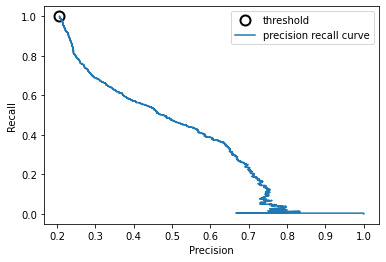

In [85]:
import mglearn
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, best_para_lin_SVM.decision_function(X_test))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")




In [86]:
Summary_lin_SVM= {'Type': 'Linear SVM', 'Train Score': best_para_lin_SVM.score(X_train, y_train)*100,
              'Testing Score':best_para_lin_SVM.score(X_test, y_test)*100,
              'f1 Score':f1_score(y_test, best_para_lin_SVM.predict(X_test))};

In [87]:
Summary_lin_SVM

{'Type': 'Linear SVM',
 'Train Score': 79.63555555555556,
 'Testing Score': 80.28,
 'f1 Score': 0.12329579134558386}

<h2>4.Kerenilzed Support Vector Machine (rbf, poly, and linear)</h2>
Reducing sample size to 1000 samples with subsampling, map the training samples with random feature mapping to obtain training set and train linear SVMs in parallel to get a unified model on the training set. 

In [88]:
dcc_k = dcc.sample(n = 1000, random_state= 0)

dcc_k.shape

(1000, 24)

In [89]:
dcc_k.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Payment
8225,20000,1,1,2,33,1.0,2.0,0.0,2.0,2.0,...,18453.0,19755.0,19288.0,0.0,2260.0,0.0,1600.0,0.0,644.0,0.0
10794,20000,2,2,2,35,0.0,0.0,2.0,0.0,0.0,...,19000.0,19000.0,20000.0,3400.0,0.0,1000.0,0.0,1000.0,0.0,0.0
9163,230000,2,1,1,44,1.0,-1.0,-1.0,-1.0,-1.0,...,933.0,0.0,0.0,949.0,2873.0,933.0,0.0,0.0,0.0,0.0
26591,100000,1,2,1,42,0.0,0.0,0.0,0.0,0.0,...,17758.0,18774.0,20272.0,5000.0,2000.0,2000.0,2000.0,2000.0,2000.0,0.0
6631,150000,1,1,2,29,-2.0,-2.0,-2.0,-2.0,-2.0,...,6469.0,5138.0,7810.0,6989.0,833.0,6488.0,5153.0,7833.0,7130.0,0.0


In [90]:
X_k = dcc_k.drop(['Default_Payment'],axis =1)

y_k = dcc_k['Default_Payment']

X_train_org_k, X_test_org_k, y_train_k, y_test_k = train_test_split(X_k, y_k, random_state = 0)

</b> Scaling the small sample </b>

In [91]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler_new = MinMaxScaler()
X_train_k = scaler_new.fit_transform(X_train_org_k)
X_test_k = scaler_new.transform(X_test_org_k)


In [92]:
pd.DataFrame(X_train_k).head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.229730,0.0,0.666667,1.0,0.458333,0.166667,0.125,0.000000,0.333333,0.000000,...,0.009483,0.065830,0.011560,0.011295,0.022956,0.005948,0.026004,0.006334,0.005109,0.049706
1,0.351351,0.0,0.666667,1.0,0.125000,0.333333,0.250,0.285714,0.333333,0.285714,...,0.029363,0.072252,0.033622,0.223270,0.024000,0.004987,0.002494,0.004999,0.234451,0.357518
2,0.081081,0.0,0.333333,1.0,0.166667,0.333333,0.250,0.285714,0.666667,0.285714,...,0.061251,0.110323,0.076257,0.080785,0.006192,0.005486,0.003990,0.004999,0.003517,0.010726
3,0.148649,0.0,0.333333,1.0,0.250000,0.333333,0.250,0.285714,0.333333,0.285714,...,0.018748,0.059360,0.028773,0.106315,0.022008,0.019753,0.014215,0.027082,0.009378,0.012513
4,0.391892,1.0,0.333333,1.0,0.104167,0.333333,0.250,0.285714,0.333333,0.285714,...,0.029646,0.081486,0.050363,0.036995,0.012000,0.012469,0.012470,0.009999,0.011723,0.017876


In [93]:
pd.DataFrame(X_test_k).head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.148649,1.0,0.333333,0.5,0.458333,0.333333,0.25,0.285714,0.333333,0.285714,...,0.051360,0.100005,0.069962,0.018702,0.012000,0.007481,0.004988,0.012043,0.000000,0.035752
1,0.000000,1.0,0.666667,1.0,0.125000,0.500000,0.50,0.571429,0.333333,0.285714,...,0.020746,0.136663,0.023020,0.007080,0.004920,0.000000,0.001247,0.001125,0.000000,0.018705
2,0.554054,0.0,0.333333,1.0,0.229167,0.333333,0.00,0.000000,0.000000,0.000000,...,0.013338,0.068932,0.021049,0.041551,0.035616,0.012135,0.030528,0.019085,0.041868,0.035956
3,0.054054,1.0,0.666667,0.5,0.395833,0.333333,0.25,0.285714,0.333333,0.285714,...,0.059323,0.104537,0.067617,0.071924,0.008000,0.007481,0.007482,0.007499,0.004689,0.003575
4,0.202703,0.0,0.333333,0.5,0.187500,0.166667,0.25,0.285714,0.333333,0.285714,...,0.069378,0.118922,0.083019,0.076071,0.161812,0.004992,0.003741,0.004999,0.002345,0.023035


In [94]:
c_range = [0.001,0.01, 0.1, 1, 10,100]
k1_train_score = []
k1_test_score = []
for C in c_range:
    kernal_new = svm.SVC(kernel = 'linear', C=C)
    kernal_new.fit(X_train_k,y_train_k) 
    k1_train_score.append(kernal_new.score(X_train_k,y_train_k))
    k1_test_score.append(kernal_new.score(X_test_k, y_test_k))

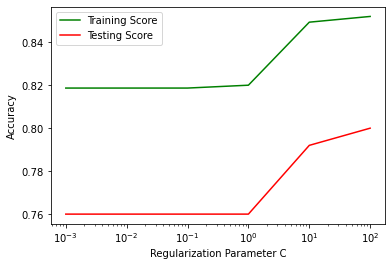

In [95]:
plt.plot(c_range, k1_train_score, label = 'Training Score', c = 'g')
plt.plot(c_range, k1_test_score, label = 'Testing Score', c='r')
plt.xscale('log')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Accuracy')

plt.legend()

In [96]:
from sklearn.svm import LinearSVC,SVC
kernal_new = svm.SVC(kernel = 'linear', C=10)
kernal_new.fit(X_train_k, y_train_k) 
print("train score {:.3f}".format(kernal_new.score(X_train_k, y_train_k)))
print("test score: {:.3f}".format(kernal_new.score(X_test_k, y_test_k)))


train score 0.849
test score: 0.792


In [97]:
from sklearn import svm
from sklearn.svm import SVC
c_range = [0.001,0.01, 0.1, 1, 10,100]
k2_train_score = []
k2_test_score = []
for C in c_range:
    kernal_new2 = svm.SVC(kernel = 'poly', C=C)
    kernal_new2.fit(X_train_k,y_train_k) 
    k2_train_score.append(kernal_new.score(X_train_k,y_train_k))
    k2_test_score.append(kernal_new.score(X_test_k, y_test_k))

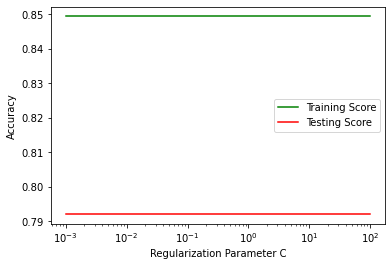

In [98]:
plt.plot(c_range, k2_train_score, label = 'Training Score', c = 'g')
plt.plot(c_range, k2_test_score, label = 'Testing Score', c='r')
plt.xscale('log')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Accuracy')

plt.legend()

In [99]:
from sklearn.svm import LinearSVC,SVC
kernal_new2 = svm.SVC(kernel = 'poly', C=10)
kernal_new2.fit(X_train_k, y_train_k) 
print("train score {:.3f}".format(kernal_new2.score(X_train_k, y_train_k)))
print("test score: {:.3f}".format(kernal_new2.score(X_test_k, y_test_k)))


train score 0.892
test score: 0.796


In [100]:
from sklearn import svm
from sklearn.svm import SVC
c_range = [0.001,0.01, 0.1, 1, 10,100]
k3_train_score = []
k3_test_score = []
for C in c_range:
    kernal_new3 = svm.SVC(kernel = 'rbf', C=C)
    kernal_new3.fit(X_train_k,y_train_k) 
    k3_train_score.append(kernal_new3.score(X_train_k,y_train_k))
    k3_test_score.append(kernal_new3.score(X_test_k, y_test_k))

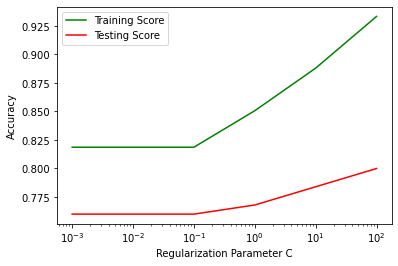

In [101]:
plt.plot(c_range, k3_train_score, label = 'Training Score', c = 'g')
plt.plot(c_range, k3_test_score, label = 'Testing Score', c='r')
plt.xscale('log')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Accuracy')

plt.legend()

In [102]:
from sklearn.svm import LinearSVC,SVC
kernal_new3 = svm.SVC(kernel = 'rbf', C=10)
kernal_new3.fit(X_train_k, y_train_k) 
print("train score {:.3f}".format(kernal_new3.score(X_train_k, y_train_k)))
print("test score: {:.3f}".format(kernal_new3.score(X_test_k, y_test_k)))

train score 0.888
test score: 0.784


<b> GridSearch for Kerenilzed Support Vector Machine (rbf, poly, and linear) </b>

In [103]:
best_score=0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
       
        svm = SVC(gamma = gamma, C=C)
        
        CV_scores = cross_val_score(svm, X_train_k, y_train_k, cv=5)
        
        CV_score = np.mean(CV_scores)
        
        if CV_score > best_score:
            best_score = CV_score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_train_k, y_train_k)

SVC(C=10, gamma=0.1)

In [104]:
kernelSVC_parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel':['rbf','poly','linear']}

In [105]:
print(classification_report(y_pred = SVM_value_y, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89      5950
         1.0       0.76      0.07      0.12      1550

    accuracy                           0.80      7500
   macro avg       0.78      0.53      0.51      7500
weighted avg       0.79      0.80      0.73      7500



In [106]:
from sklearn.model_selection import GridSearchCV

KernelSVC = SVC()
GS_KernelSVC = GridSearchCV(KernelSVC, kernelSVC_parameters, cv = 5, return_train_score= True, n_jobs= -1)
GS_KernelSVC.fit(X_train_k,y_train_k)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'linear']},
             return_train_score=True)

In [107]:
print("Best score : KernelSVM grid search ")
round(GS_KernelSVC.best_score_,2)

Best score : KernelSVM grid search 


0.84

In [108]:
print("Best parameters- KernelSVM grid search ")
GS_KernelSVC.best_params_

Best parameters- KernelSVM grid search 


{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

<h1> kernel = poly </h1>

In [109]:
best_para_svm_poly = SVC(C = 0.1, gamma = 1, kernel = 'poly', verbose = 1)

best_para_svm_poly.fit(X_train_k,y_train_k)
SVM_value_y_poly = best_para_svm_poly.predict(X_test_k)
print('Training score: {:.3f}'.format(best_para_svm_poly.score(X_train_k, y_train_k)))
print('Testing score: {:.3f}'.format(best_para_svm_poly.score(X_test_k, y_test_k)))

    

[LibSVM]Training score: 0.856
Testing score: 0.768


In [110]:
print(classification_report(SVM_value_y_poly,y_test_k))

              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87       240
         1.0       0.10      0.60      0.17        10

    accuracy                           0.77       250
   macro avg       0.54      0.69      0.52       250
weighted avg       0.94      0.77      0.84       250



In [111]:
import mglearn

In [112]:
print(confusion_matrix(y_pred = SVM_value_y_poly,y_true = y_test_k))

[[186   4]
 [ 54   6]]


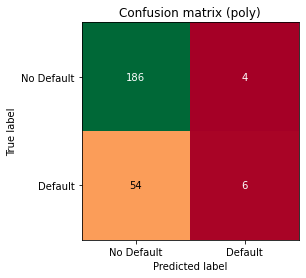

In [113]:
%matplotlib inline

heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = SVM_value_y_poly, y_true = y_test_k), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt = "%d")
plt.title("Confusion matrix (poly)")
plt.gca().invert_yaxis()

In [114]:
Kernel_poly_precision_score=precision_score(y_test_k,best_para_svm_poly.predict(X_test_k))
print('Precision score : {:.2f} '.format(Kernel_poly_precision_score))
          

Precision score : 0.60 


In [115]:
Kernel_poly_f1_score=f1_score(y_test_k, best_para_svm_poly.predict(X_test_k))
print('f1 Score : {:.2f} '.format(Kernel_poly_f1_score))
          

f1 Score : 0.17 


In [116]:
Kernel_poly_recall_score=recall_score(y_test_k, best_para_svm_poly.predict(X_test_k))
print('Recall score : {:.2f} '.format(Kernel_poly_recall_score))
          

Recall score : 0.10 


In [117]:
Summary_Kernelized_poly= {'Type': 'Kernalized poly ', 'Train Score': best_para_svm_poly.score(X_train_k, y_train_k)*100,
              'Testing Score':best_para_svm_poly.score(X_test_k, y_test_k)*100,
              'f1 Score':f1_score(y_test_k, best_para_svm_poly.predict(X_test_k))};

In [118]:
Summary_Kernelized_poly

{'Type': 'Kernalized poly ',
 'Train Score': 85.6,
 'Testing Score': 76.8,
 'f1 Score': 0.17142857142857143}

<h1> Kernel = rbf </h1>

In [119]:
best_para_svm_rbf = SVC(C = 0.1, gamma = 1, kernel = 'rbf', verbose = 1)

best_para_svm_rbf.fit(X_train_k,y_train_k)
SVM_value_y_rbf = best_para_svm_rbf.predict(X_test_k)
print('Training score: {:.3f}'.format(best_para_svm_rbf.score(X_train_k, y_train_k)))
print('Testing score: {:.3f}'.format(best_para_svm_rbf.score(X_test_k, y_test_k)))


[LibSVM]Training score: 0.819
Testing score: 0.760


In [120]:
print(classification_report(SVM_value_y_rbf,y_test_k))

              precision    recall  f1-score   support

         0.0       1.00      0.76      0.86       250
         1.0       0.00      0.00      0.00         0

    accuracy                           0.76       250
   macro avg       0.50      0.38      0.43       250
weighted avg       1.00      0.76      0.86       250



In [121]:
print(confusion_matrix(y_pred = SVM_value_y_rbf,y_true= y_test_k))

[[190   0]
 [ 60   0]]


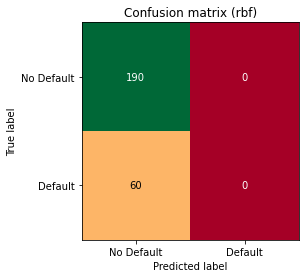

In [122]:
%matplotlib inline

heatmap = mglearn.tools.heatmap(confusion_matrix(y_pred = SVM_value_y_rbf, y_true = y_test_k), xlabel = 'Predicted label', ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt = "%d")
plt.title("Confusion matrix (rbf)")
plt.gca().invert_yaxis()


In [123]:
Kernel_rbf_precision_score=precision_score(y_test_k,best_para_svm_rbf.predict(X_test_k))
print('Precision score : {:.2f} '.format(precision_score(y_test_k,best_para_svm_rbf.predict(X_test_k))))
           

Precision score : 0.00 


In [124]:
Kernel_rbf_f1_score=f1_score(y_test_k, best_para_svm_rbf.predict(X_test_k))
print('f1 Score : {:.2f} '.format(Kernel_rbf_f1_score))
          

f1 Score : 0.00 


In [125]:
Kernel_rbf_recall_score=recall_score(y_test_k, best_para_svm_rbf.predict(X_test_k))
print('Recall score : {:.2f} '.format(Kernel_rbf_recall_score))
          

Recall score : 0.00 


In [126]:
Summary_Kernelized_rbf= {'Type': 'Kernalized rbf ', 'Train Score': best_para_svm_rbf.score(X_train_k, y_train_k)*100,
              'Testing Score':best_para_svm_rbf.score(X_test_k, y_test_k)*100,
              'f1 Score':f1_score(y_test_k, best_para_svm_rbf.predict(X_test_k))};

In [127]:
Summary_Kernelized_rbf

{'Type': 'Kernalized rbf ',
 'Train Score': 81.86666666666666,
 'Testing Score': 76.0,
 'f1 Score': 0.0}

<h1> Kernel = linear </h1>

In [128]:
best_para_svm_linear = SVC(C = 0.1, cache_size = 200, gamma = 1, kernel = 'linear', verbose = 1)

best_para_svm_linear.fit(X_train_k,y_train_k)
SVM_value_y_linear = best_para_svm_linear.predict(X_test_k)
print('Training score: {:.3f}'.format(best_para_svm_linear.score(X_train_k, y_train_k)))
print('Testing score: {:.3f}'.format(best_para_svm_linear.score(X_test_k, y_test_k)))


[LibSVM]Training score: 0.819
Testing score: 0.760


In [129]:
print(classification_report(SVM_value_y_linear,y_test_k))

              precision    recall  f1-score   support

         0.0       1.00      0.76      0.86       250
         1.0       0.00      0.00      0.00         0

    accuracy                           0.76       250
   macro avg       0.50      0.38      0.43       250
weighted avg       1.00      0.76      0.86       250



In [130]:
print(confusion_matrix(y_pred = SVM_value_y_linear,y_true = y_test_k))

[[190   0]
 [ 60   0]]


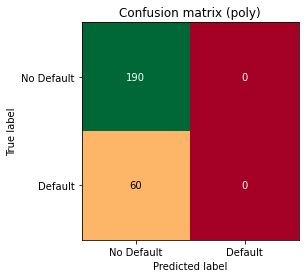

In [131]:
%matplotlib inline

heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = SVM_value_y_linear, y_true = y_test_k), xlabel = 'Predicted label', ylabel='True label', xticklabels = ['No Default','Default'],
    yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt = "%d")
plt.title("Confusion matrix (poly)")
plt.gca().invert_yaxis()

In [132]:
Kernel_linear_precision_score=precision_score(y_test_k,best_para_svm_linear.predict(X_test_k))
print('Precision score : {:.2f} '.format(precision_score(y_test_k,best_para_svm_linear.predict(X_test_k))))
           

Precision score : 0.00 


In [133]:
Kernel_linear_f1_score=f1_score(y_test_k, best_para_svm_linear.predict(X_test_k))
print('f1 Score : {:.2f} '.format(Kernel_linear_f1_score))
          

f1 Score : 0.00 


In [134]:
Kernel_linear_recall_score=recall_score(y_test_k, best_para_svm_linear.predict(X_test_k))
print('Recall score : {:.2f} '.format(Kernel_linear_recall_score))
          

Recall score : 0.00 


In [135]:
Summary_Kernelized_linear= {'Type': 'Kernalized linear ', 'Train Score': best_para_svm_linear.score(X_train_k, y_train_k)*100,
              'Testing Score':best_para_svm_linear.score(X_test_k, y_test_k)*100,
              'f1 Score':f1_score(y_test_k, best_para_svm_linear.predict(X_test_k))};

In [136]:
Summary_Kernelized_linear

{'Type': 'Kernalized linear ',
 'Train Score': 81.86666666666666,
 'Testing Score': 76.0,
 'f1 Score': 0.0}

In [137]:
from sklearn.tree import DecisionTreeClassifier

dtree_training = []
dtree_testing = []

for depth in range(1,20):
    dtree = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    dtree.fit(X_train, y_train)
    dtree_training.append(dtree.score(X_train, y_train))
    dtree_testing.append(dtree.score(X_test, y_test))

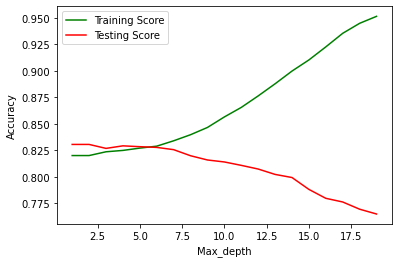

In [138]:
xvalues = range(1,20)

plt.plot(xvalues, dtree_training, label = 'Training Score', c = 'g')
plt.plot(xvalues, dtree_testing, label = 'Testing Score', c = 'r')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()

Based on above graph max_depth = 7

In [139]:
dtree = DecisionTreeClassifier(max_depth = 7)

dtree.fit(X_train, y_train)
dtree_value_y = dtree.predict(X_test)

print('Training score: {:.3f}'.format(dtree.score(X_train, y_train)))
print('Testing score: {:.3f}'.format(dtree.score(X_test, y_test)))

Training score: 0.834
Testing score: 0.826


<b>Decision Tree Feature Selection</b>

<AxesSubplot:>

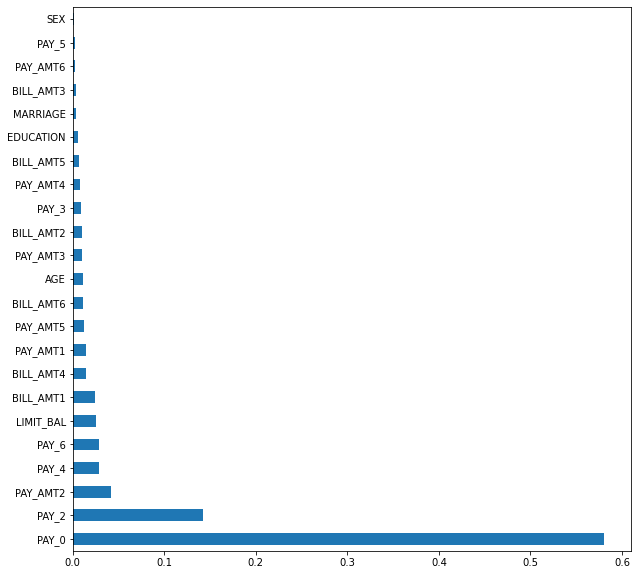

In [140]:
feat_importance = pd.Series(dtree.feature_importances_, index=X.columns)
feat_importance.nlargest(X.shape[1]).plot(kind='barh', figsize=(10, 10))

<b> PAY_O: Repayment status in September, 2005 is the most important feature. </b> 

<b>Cross validation scores for Decision Tree Classifier</b>

In [141]:
dtree_CV_scores = cross_val_score(dtree, X_train,y_train, cv = 7)

pd.DataFrame({"Cross-Validation scores": dtree_CV_scores})

,Cross-Validation scores
0,0.814619
1,0.820840
2,0.822029
3,0.813317
4,0.817984
5,0.813939
6,0.821717


In [142]:
print("cross-validation score is : {:.2f}".format(dtree_CV_scores.mean()))

cross-validation score is : 0.82


<b>Grid Search with Decision Tree Classifier</b>

In [143]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [144]:
param_grid_dtree = {'max_depth': range(1,20),'criterion':['gini','entropy'],'min_samples_leaf' : range(2,50)}
CV_dtrees = GridSearchCV(estimator = dtree, cv = 7, param_grid = param_grid_dtree , verbose = 1, n_jobs = -1)
GS_results_dtrees = CV_dtrees.fit(X_train, y_train)
best_parameters_dtrees = CV_dtrees.best_params_
print(best_parameters_dtrees)



Fitting 7 folds for each of 1824 candidates, totalling 12768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 2428 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4634 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 6234 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 7944 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 9594 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 10744 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 11994 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 12768 out of 12768 | elapsed: 11.4min finished


{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 48}


In [145]:
print("Best score : Decision Tree grid search ")
round(GS_results_dtrees.best_score_,2)

Best score : Decision Tree grid search 


0.82

In [146]:
print("Best parameters : Decision Tree grid search ")
GS_results_dtrees.best_params_

Best parameters : Decision Tree grid search 


{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 48}

In [147]:
best_dtree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=48)

best_dtree.fit(X_train, y_train)
dtree_value_y = best_dtree.predict(X_test)

print('Training score: {:.3f}'.format(best_dtree.score(X_train, y_train)))
print('Testing score: {:.3f}'.format(best_dtree.score(X_test, y_test)))

Training score: 0.825
Testing score: 0.829


In [148]:
print(classification_report(y_pred =dtree_value_y, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      5950
         1.0       0.66      0.35      0.46      1550

    accuracy                           0.83      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.81      0.83      0.81      7500



In [149]:
print(confusion_matrix(y_pred = dtree_value_y, y_true = y_test))

[[5674  276]
 [1003  547]]


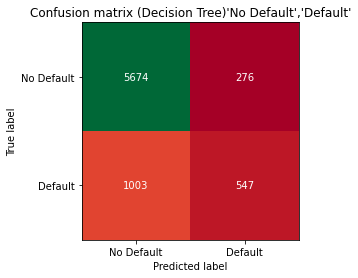

In [150]:
%matplotlib inline

heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = dtree_value_y, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'],yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix (Decision Tree)'No Default','Default'")

plt.gca().invert_yaxis()

In [151]:
dtree_precision_score=precision_score(y_test, best_dtree.predict(X_test))
print('Precision score : {:.2f} '.format(dtree_precision_score))

Precision score : 0.66 


In [152]:
dtree_recall_score = recall_score(y_test, best_dtree.predict(X_test))
print('Recall score : {:.2f} '.format(dtree_recall_score))

Recall score : 0.35 


In [153]:
dtree_f1_score = f1_score(y_test,best_dtree.predict(X_test))
print('f1 score : {:.2f} '.format(dtree_f1_score))

f1 score : 0.46 


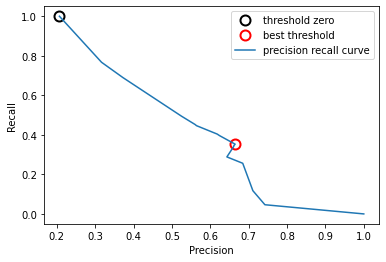

In [154]:
import mglearn
%matplotlib inline
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, best_dtree.predict_proba(X_test)[:,1])

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(dtree_precision_score, dtree_recall_score, 'o', markersize=10,
         label="best threshold", fillstyle="none", c='r', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [155]:
Summary_dtree= {'Type': 'Decision Tree', 'Train Score': best_dtree.score(X_train, y_train)*100,
              'Testing Score':best_dtree.score(X_test, y_test)*100,
              'f1 Score':f1_score(y_test, best_dtree.predict(X_test))};

In [156]:
Summary_dtree

{'Type': 'Decision Tree',
 'Train Score': 82.45333333333333,
 'Testing Score': 82.94666666666667,
 'f1 Score': 0.46101980615254945}

<h1>Comparing All Models</h1>

In [157]:
Summary_Knn

{'Type': 'K-nearest Neighbors (KNN) Classification Model',
 'Training Score': 100.0,
 'Testing Score': 81.0,
 'f1 Score': 0.35256701499318494}

In [158]:
Summary_Logistic

{'Type': 'Logistic Regression',
 'Train Score': 81.05333333333333,
 'Testing Score': 81.65333333333334,
 'f1 Score': 0.2993890020366599}

In [159]:
Summary_lin_SVM

{'Type': 'Linear SVM',
 'Train Score': 79.63555555555556,
 'Testing Score': 80.28,
 'f1 Score': 0.12329579134558386}

In [160]:
Summary_Kernelized_rbf

{'Type': 'Kernalized rbf ',
 'Train Score': 81.86666666666666,
 'Testing Score': 76.0,
 'f1 Score': 0.0}

In [161]:
Summary_Kernelized_linear

{'Type': 'Kernalized linear ',
 'Train Score': 81.86666666666666,
 'Testing Score': 76.0,
 'f1 Score': 0.0}

In [162]:
Summary_Kernelized_poly

{'Type': 'Kernalized poly ',
 'Train Score': 85.6,
 'Testing Score': 76.8,
 'f1 Score': 0.17142857142857143}

In [163]:
Summary_dtree

{'Type': 'Decision Tree',
 'Train Score': 82.45333333333333,
 'Testing Score': 82.94666666666667,
 'f1 Score': 0.46101980615254945}

In [164]:
X = dcc.drop('Default_Payment',axis =1)
y = dcc['Default_Payment']
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)



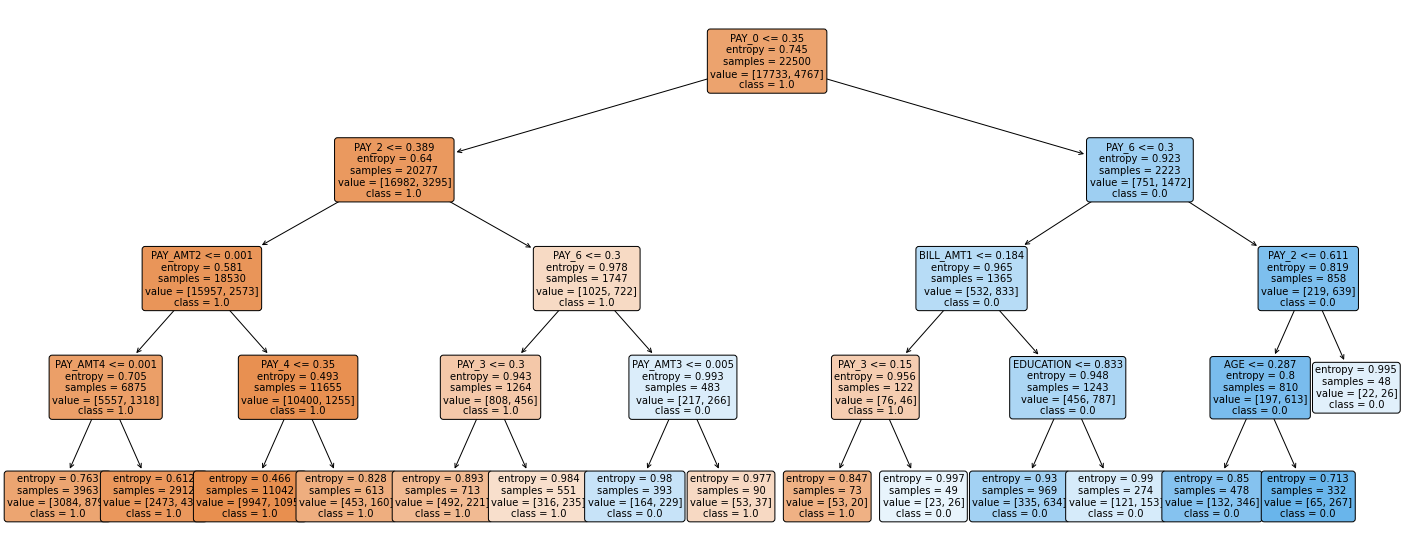

In [165]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtree_feature_names =X.columns
dtree_target_names = y.unique().astype(str).tolist()
plt.figure(figsize=(25,10))
plot_tree(best_dtree, 
          feature_names = dtree_feature_names, 
          class_names = dtree_target_names, 
          filled = True, 
          rounded = True, fontsize=10)

plt.savefig('tree_visualization.png') 

plt.show()


<b>1)From above summary we can state that Decision Tree is the best classification model as the training and test scores are 82.45% and 82.94% respectively with a f1 score of 0.46 which is highest compared to other candidates, since we have different model predicting the same thing, f1 score is a good choice for this purpose as it depends heavily on how imbalanced our training dataset is.</b>

<b>2)Since the target variable in our dataset is highly skewed towards one particular category, thus decision tree performs fairly better than other classification models in this case.</b>

<b>3) PAY_O: Repayment status in September, 2005 is the most important feature </b>

# <font color='red'> End of Project 1 : Classification

######  Initials:                                                                                

######                                                                                                                                                                                                                                            -rp